In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns #Visualization
sns.set()

In [2]:
p=pd.read_excel("petrol_1.xlsx")

In [3]:
p.head(2)

,Petrol_tax,Average Income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524


In [4]:
p.describe()

,Petrol_tax,Average Income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


petrol_c= c+z1(A.I)+Z2(PT)+Z3(DL)+Z4(ph)+Error 

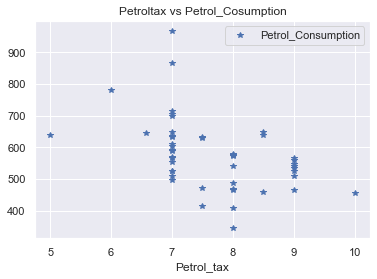

In [5]:

p.plot(x='Petrol_tax', y='Petrol_Consumption', style='*') 
plt.title('Petroltax vs Petrol_Cosumption')    
plt.show()  


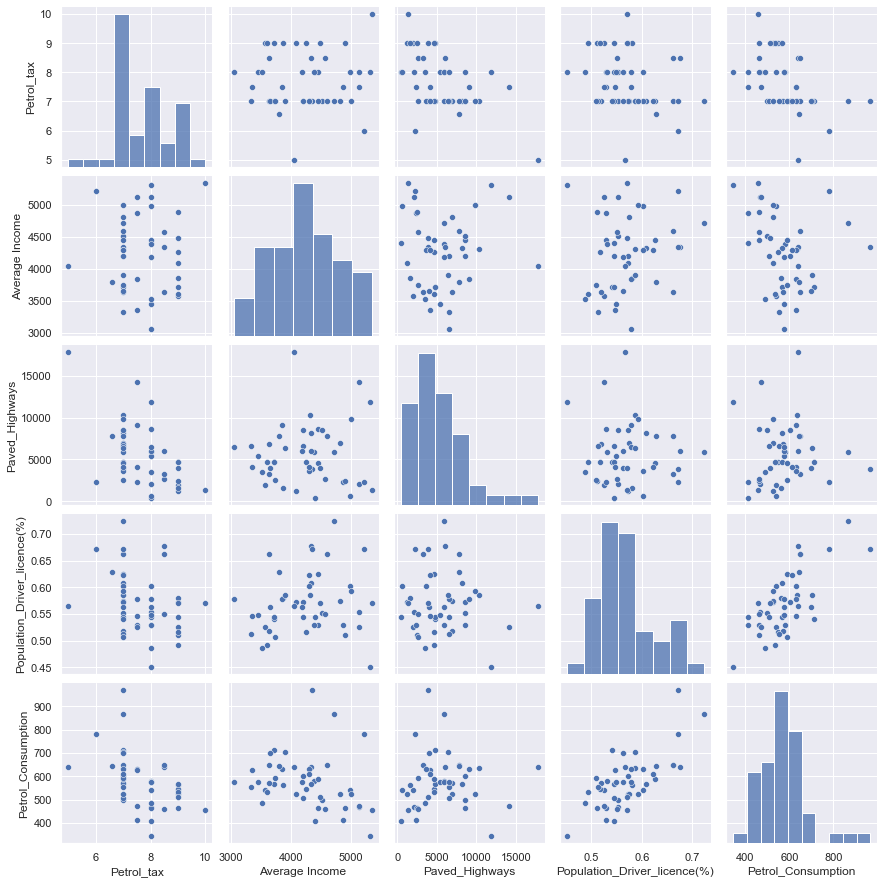

In [6]:
sns.pairplot(p)

## Preparing the Data
- Target variable :Petrol_Consumption
- features : rest

**X contains all the independent variables & y contains the target variable**

##  Correlation coefficient 
Is a measure of the association between two variables. It is used to find the relationship is between data and a measure to check how strong it is. The formulas return a value between -1 and 1 wherein one shows -1 shows negative correlation and +1 shows a positive correlation


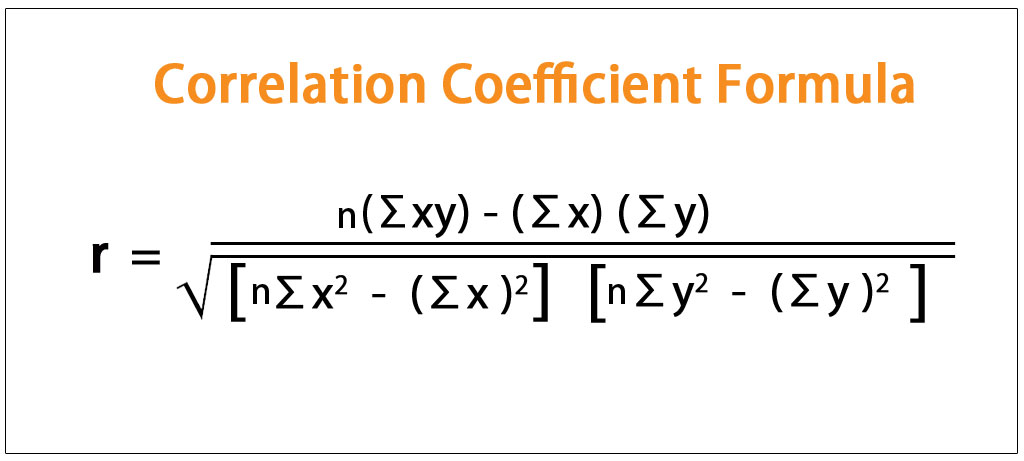

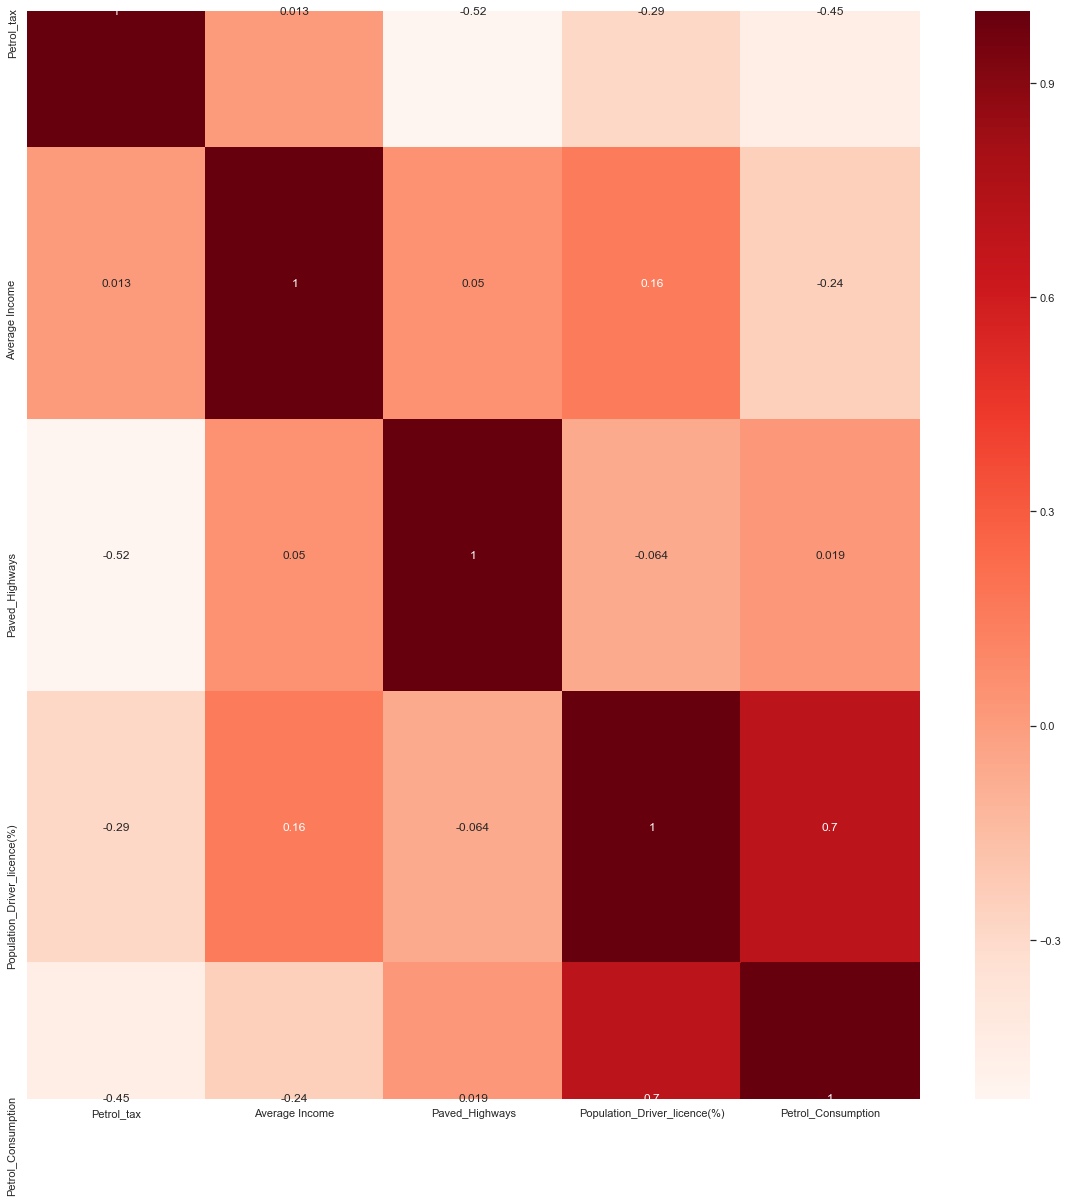

In [7]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()
plt.figure(figsize=(20,20))
cor = p.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [7]:
#Correlation with output variable
cor_target = abs(cor["Petrol_Consumption"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.44]
relevant_features

NameError: name 'cor' is not defined

In [9]:
X = p[['Petrol_tax',  
       'Population_Driver_licence(%)','Average Income']]
y = p['Petrol_Consumption']  

In [10]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)  

### RFE (Recursive Feature Elimination)

The Recursive Feature Elimination (RFE) method works by recursively removing attributes and building a model on those attributes that remain. It uses accuracy metric to rank the feature according to their importance. The RFE method takes the model to be used and the number of required features as input. It then gives the ranking of all the variables, 1 being most important. It also gives its support, True being relevant feature and False being irrelevant feature.


In [11]:
from sklearn.linear_model import LinearRegression 
from sklearn.feature_selection import RFE
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 2)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True False]
[1 1 2]


## Training the Algorithm

To find the most fit feature by comparing regression cofficients . We will apply regression fit() to this data

In [12]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Petrol Consumtion= -32(Petrol-Tax) +1398(D.L) + 

In [13]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df  


,Coefficient
Petrol_tax,-30.754609
Population_Driver_licence(%),1423.789146
Average Income,-0.068835


- This means that for a unit increase in "petroltax", there is a **decrease** of 33 million gallons in gas consumption. 
- A  unit increase in proportion of population with a drivers license results in an **increase** of 1.398 billion gallons of gas consumption. 
- We can see that **Averageincome** and **Paved_Highways** have a very little effect on the gas consumption.

## Making Predictions

In [14]:
y_pred = regressor.predict(X_test)  

In [15]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df  


,Actual,Predicted
29,534,473.586632
4,410,522.024283
26,577,593.181374
30,571,568.006019
32,577,662.396462
37,704,647.133127
34,487,500.823449
40,587,666.087860
7,467,484.795456
10,580,502.641914


## Evaluating the Algorithm

In [16]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 42.53282097683383
Mean Squared Error: 2942.779724134492
Root Mean Squared Error: 54.24739370821876


## Conclusions:
- value of root mean squared error is 60.07, which is slightly greater than 10% of the mean value of the gas consumption in all states. This means that our algorithm was not very accurate but can still make reasonably good predictions.


- Need more data: Only one year worth of data isn't that much, whereas having multiple years worth could have helped us improve the accuracy quite a bit.
- Bad assumptions: We made the assumption that this data has a linear relationship, but that might not be the case. Visualizing the data may help you determine that.
- Poor features: The features we used may not have had a high enough correlation to the values we were trying to predict.
    